In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import platform
from scipy.optimize import curve_fit

In [2]:
from shapes import *
from detect_bubbles import *
from utils import *

In [3]:
%load_ext autoreload
%autoreload 2

In [7]:
platform.system()

'Windows'

In [8]:
plat = platform.system()
if plat == "Darwin":
    calib_dir =  "/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_35_calib_DoF" 
elif plat == "Windows":
    calib_dir = "../Messungen/Reihe_35_calib_DoF/"

In [9]:
cim = []
bgim = []
filenames = []
for file in os.listdir(calib_dir):
    filenames.append(file)

filenames.sort() # sort after creation date since date is in the name

In [10]:
for file in filenames:
    if file.endswith("2.bmp"):
        img = cv2.imread(os.path.join(calib_dir, file), 0)
        cim.append(img)
    elif file.endswith("1.bmp"):
        img = cv2.imread(os.path.join(calib_dir, file), 0)
        bgim.append(img)

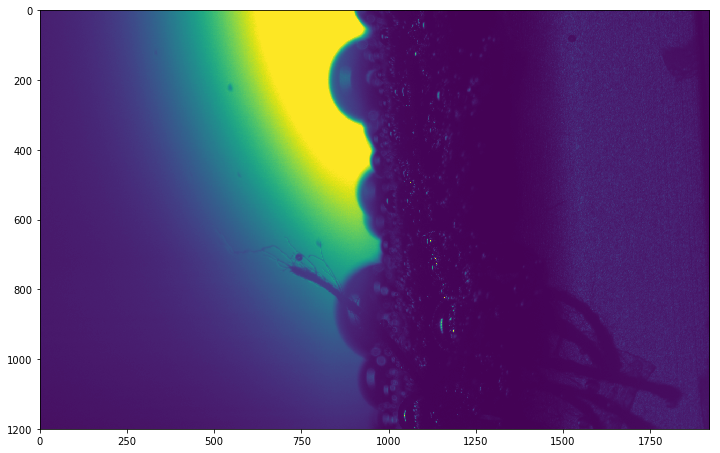

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(bgim[-4])

In [20]:
""""
for idx, im in enumerate(bgim[1:]):
    cv2.imwrite(os.path.join(str(idx)+".bmp", "greenredlit"), im)
    
for idx, im in enumerate(cim[1:]):
    cv2.imwrite(str(idx)+".bmp", im)
""""

In [9]:
# load stable data
stable_img_dir = "data/stable_redlit/"
filenames = [fn for fn in os.listdir(stable_img_dir) if fn.endswith(".png")]
filenames

['stbl0001.png',
 'stbl0002.png',
 'stbl0003.png',
 'stbl0004.png',
 'stbl0005.png',
 'stbl0006.png',
 'stbl0007.png',
 'stbl0008.png',
 'stbl0009.png',
 'stbl0010.png',
 'stbl0011.png',
 'stbl0012.png',
 'stbl0013.png',
 'stbl0014.png',
 'stbl0015.png',
 'stbl0016.png',
 'stbl0017.png',
 'stbl0018.png',
 'stbl0019.png',
 'stbl0020.png',
 'stbl0021.png',
 'stbl0022.png',
 'stbl0023.png',
 'stbl0024.png',
 'stbl0025.png',
 'stbl0026.png',
 'stbl0027.png',
 'stbl0028.png',
 'stbl0029.png',
 'stbl0030.png',
 'stbl0031.png',
 'stbl0032.png',
 'stbl0033.png',
 'stbl0034.png',
 'stbl0035.png',
 'stbl0036.png',
 'stbl0037.png',
 'stbl0038.png',
 'stbl0039.png',
 'stbl0040.png',
 'stbl0041.png',
 'stbl0042.png',
 'stbl0043.png',
 'stbl0044.png',
 'stbl0045.png',
 'stbl0046.png',
 'stbl0047.png',
 'stbl0048.png']

In [10]:
stbl = [cv2.imread(os.path.join(stable_img_dir, fn),0) 
        for fn in filenames]

In [46]:
LINE_LEN = 50

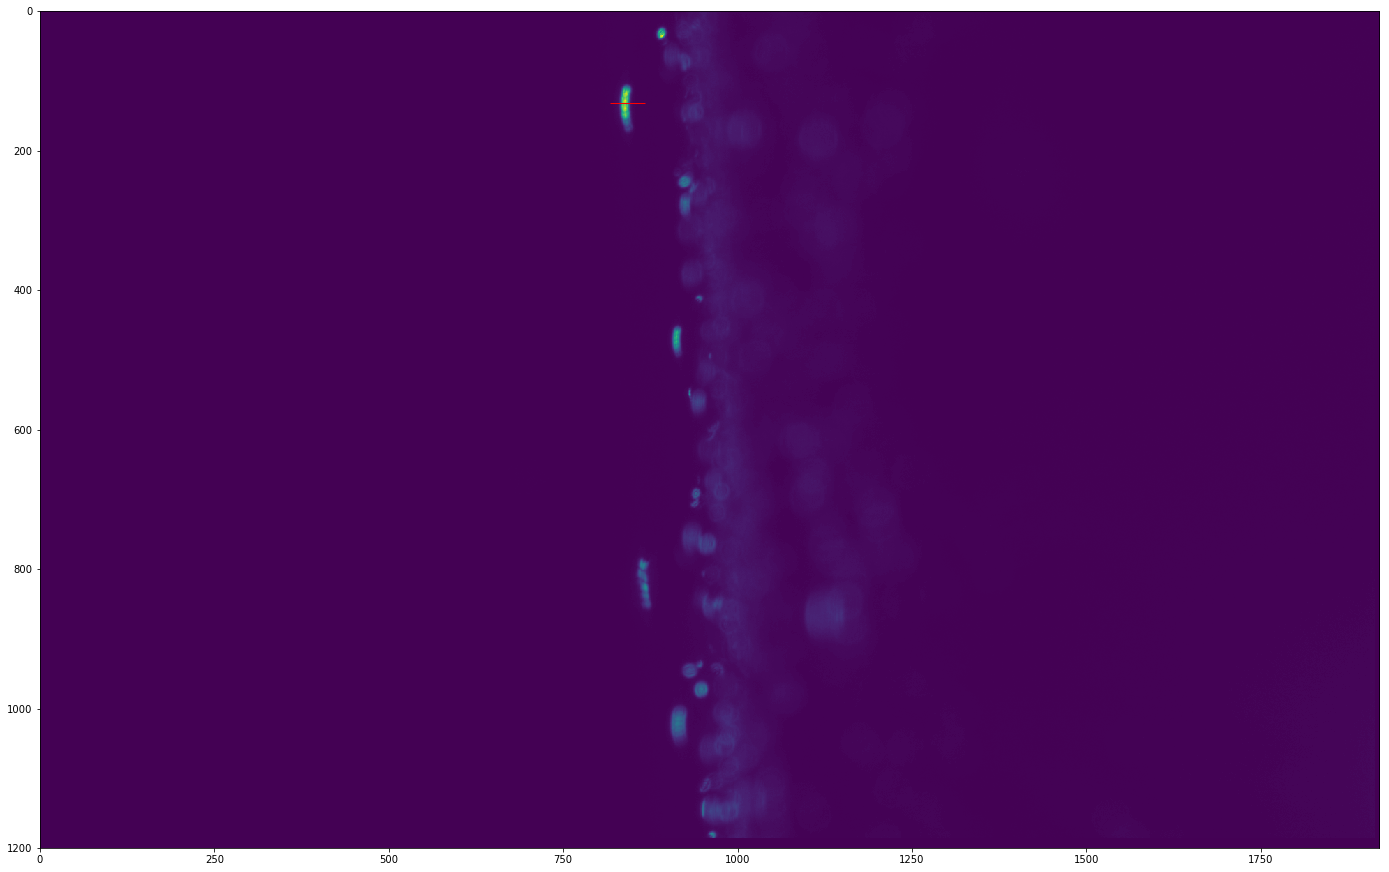

In [47]:
p1 = Point(842, 132)

fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, aspect="equal")
plt.imshow(stbl[14])
ax.add_patch(patches.Rectangle( (p1.x-LINE_LEN/2, p1.y),
                                LINE_LEN,
                                0,
                                fill=False,
                                color="red"))




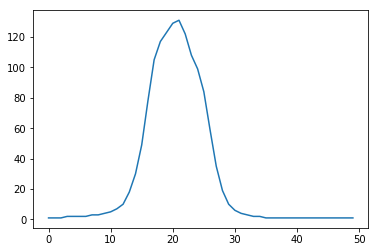

In [69]:
plt.plot(stbl[14][p1.y, int(p1.x-LINE_LEN/2):int(p1.x+LINE_LEN/2)])

In [70]:
fit_line = stbl[14][p1.y, int(p1.x-LINE_LEN/2):int(p1.x+LINE_LEN/2)]

In [86]:
(amp, mu, sigma), _ = curve_fit(gauss,
                               np.arange(0, len(fit_line)),
                               fit_line)

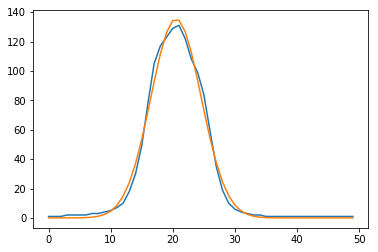

In [88]:
plt.plot(fit_line)
xdata = np.arange(0, len(fit_line))
plt.plot(gauss(xdata, amp, mu, sigma))

## same as above but automatically

In [11]:
len(stbl)

48

In [12]:
HORIZONTAL = Point(1, 0)
calib_bubbles = [ 
    CalibBubble(Line(direction=HORIZONTAL, point=Point(842, 132)), radius=80, frame_start=1, frame_end=48),
    CalibBubble(Line(HORIZONTAL, Point(912, 470)), 54, 8, 36),
    CalibBubble(Line(HORIZONTAL, Point(968, 665)), 19, 24, 38),
    CalibBubble(Line(HORIZONTAL, Point(1023, 636)), 15, 39, 44),
    CalibBubble(Line(HORIZONTAL, Point(1103, 723)), 6, 43, 47),
    CalibBubble(Line(HORIZONTAL, Point(1127, 744)), 22, 42, 48)
    
]

In [16]:
for cb in calib_bubbles:
    for f in np.arange(cb.frame_start, cb.frame_end):
        fit_line = stbl[f][p1.y, int(p1.x-LINE_LEN/2):int(p1.x+LINE_LEN/2)]
        (amp, mu, sigma), _ = curve_fit(gauss, 
                                       np.arange(0, len(fit_line)),
                                       fit_line)
        

48

In [ ]:
plt.imshow(stbl48)